In [3]:
%matplotlib inline

In [4]:
!pip install --upgrade tensorflow
!pip install keras

     |████████████████████████████████| 120.8MB 2.9MB/s eta 0:00:01    |██████                          | 23.0MB 9.1MB/s eta 0:00:11
     |████████████████████████████████| 71kB 21.7MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/8a/48/a76be51647d0eb9f10e2a4511bf3ffb8cc1e6b14e9e4fab46173aa79f981/termcolor-1.1.0.tar.gz
     |████████████████████████████████| 3.8MB 15.3MB/s eta 0:00:01
     |████████████████████████████████| 450kB 19.3MB/s eta 0:00:01
     |████████████████████████████████| 112kB 24.8MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/28/6a/8c1f62c37212d9fc441a7e26736df51ce6f0e38455816445471f10da4f0a/Keras_Preprocessing-1.1.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/71/e3/19762fdfc62877ae9102edf6342d71b28fbfd9dea3d2f96a882ce099b03f/Keras_Applications-1.0.8-py3-none-any.whl
     |████████████████████████████████| 28.4MB 20.7MB/s eta 0:00:01    |██████▍                         | 5.7MB 17.2MB/s e

  Using cached https://files.pythonhosted.org/packages/05/57/ce2e7a8fa7c0afb54a0581b14a65b56e62b5759dbc98e80627142b8a3704/oauthlib-3.1.0-py2.py3-none-any.whl
     |████████████████████████████████| 81kB 14.0MB/s eta 0:00:01
  Created wheel for opt-einsum: filename=opt_einsum-3.1.0-cp37-none-any.whl size=61682 sha256=8c797a835e33085b8a0cf54823f9e2408a3ca3bbfd53dceb8b270c2b22aff78b
  Stored in directory: /Users/hgavini/Library/Caches/pip/wheels/2c/b1/94/43d03e130b929aae7ba3f8d15cbd7bc0d1cb5bb38a5c721833
  Created wheel for termcolor: filename=termcolor-1.1.0-cp37-none-any.whl size=4832 sha256=4cacaf2d667c20aceeab8517ce379504eeb97e15eee390854a45f7be0fdd7c9d
  Stored in directory: /Users/hgavini/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
  Created wheel for absl-py: filename=absl_py-0.9.0-cp37-none-any.whl size=121932 sha256=09626939abc8a782460402fa4428a5840a44f5ff2e0a9abc50e24e279b38409a
  Stored in directory: /Users/hgavini/Library/Caches/pip/wh

In [5]:
import tensorflow.keras as keras
import tensorflow as tf
import matplotlib.pyplot as plt
print(tf.__version__)

2.1.0


Load MNIST Data, hand written 0-9 data, 28x28 images 
and seperate train data and test data

In [6]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


8


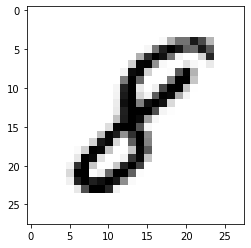

In [7]:
image_index = 7777 # You may select anything up to 60,000
print(y_train[image_index]) # image
plt.imshow(x_train[image_index], cmap='Greys')

In [8]:
x_train.shape


(60000, 28, 28)

In [9]:
print(y_train[image_index])

8


Normalizing the data

In [10]:
# Reshaping the array to 4-dims so that it can work with the Keras API
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)
# Making sure that the values are float so that we can get decimal points after division
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
# Normalizing the RGB codes by dividing it to the max RGB value.
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


Building Convolutional Neural Network

In [11]:
# Importing the required Keras modules containing model and layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
# Creating a Sequential Model and adding the layers
model = Sequential()
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) # Flattening the 2D arrays for fully connected layers
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.2))
model.add(Dense(10,activation=tf.nn.softmax))

Using TensorFlow backend.


Compiling and Fitting the Model

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])# first-order gradient-based optimization of SGD
model.fit(x=x_train,y=y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 24s 396us/step - loss: 0.2094 - accuracy: 0.9373s - l
Epoch 2/3
60000/60000 [==============================] - 25s 410us/step - loss: 0.0832 - accuracy: 0.9742
Epoch 3/3
60000/60000 [==============================] - 19s 313us/step - loss: 0.0602 - accuracy: 0.9812


Evaluating the Model

In [13]:
model.evaluate(x_test, y_test)

10000/10000 [==============================] - 1s 72us/step


[0.05738928539538756, 0.9829000234603882]

1


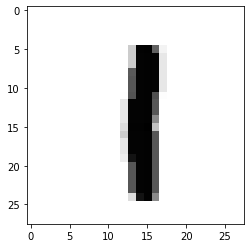

In [14]:
import numpy as np
image_index = 9090

pred = model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')
plt.show()